In [62]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.under_sampling import NearMiss

In [63]:
file_path = r"D:\Git Repositories\AuctionScout-AI-powered-player-recommendations-for-IPL-auctions\dataset\bowlers_df_labeled.csv"
df = pd.read_csv(file_path)

In [64]:
X = df.iloc[:,1:8]
y = df.iloc[:,-1]

In [65]:
X

,Deliveries_bowled,runs_conceded,wickets_taken,overs,bowling_average,bowling_strike_rate,economy
0,1248,1566,63,208,24.86,19.81,7.53
1,961,1118,36,160,31.06,26.69,6.99
2,184,283,7,30,40.43,26.29,9.43
3,6,9,0,1,48.44,39.12,9.00
4,342,435,8,57,54.38,42.75,7.63
...,...,...,...,...,...,...,...
192,30,51,0,5,48.44,39.12,10.20
193,997,1383,60,166,23.05,16.62,8.33
194,159,268,13,26,20.62,12.23,10.31
195,492,620,18,82,34.44,27.33,7.56


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

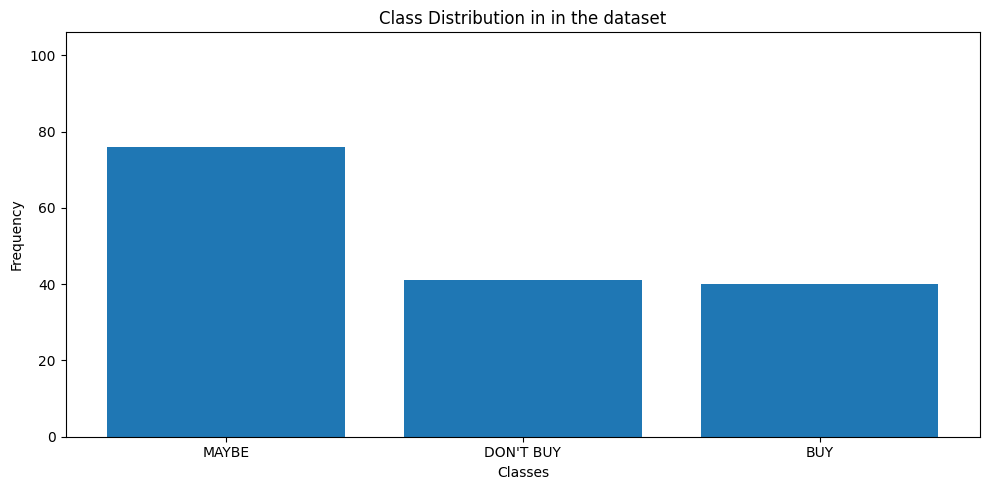

In [67]:
plt.figure(figsize=(10,5))
plt.bar(x= y_train.unique(), height=y_train.value_counts())
plt.ylim(0, pd.Series(y_train).value_counts().max() + 30)  
plt.xlabel('Classes')  
plt.ylabel('Frequency')  
plt.title('Class Distribution in in the dataset') 

plt.tight_layout()
plt.show()

In [68]:
nm = NearMiss(version=2, n_neighbors=2)

In [69]:
x_res, y_res = nm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Class Distribution in in the dataset')

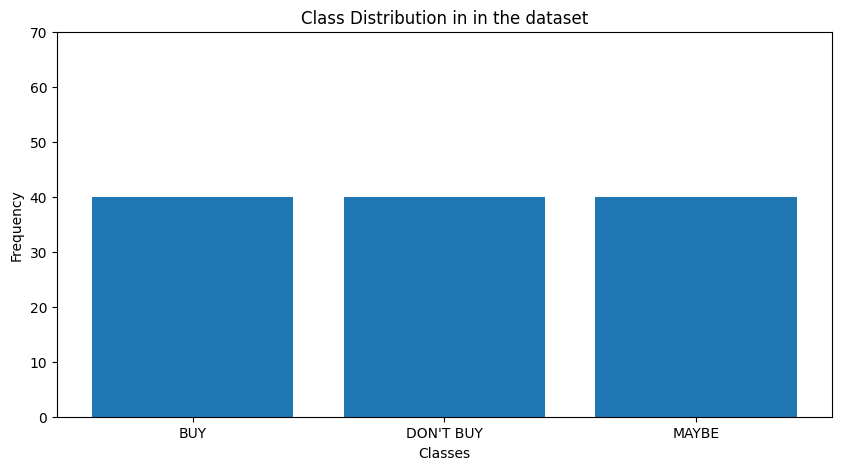

In [70]:
plt.figure(figsize=(10,5))
plt.bar(x=y_res.unique(), height=y_res.value_counts())
plt.ylim(0, pd.Series(y_res).value_counts().max() + 30)
plt.xlabel('Classes')  
plt.ylabel('Frequency')  
plt.title('Class Distribution in in the dataset') 

In [71]:
def correlation(dataset, Threshold):
    corr_matrix = dataset.corr()
    column_names = set()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > Threshold:
                col_name = corr_matrix.columns[i]
                column_names.add(col_name)
    return column_names

In [72]:
corr_features = correlation(x_res, 0.8)
corr_features

{'bowling_strike_rate', 'overs', 'runs_conceded', 'wickets_taken'}

In [73]:
x_res_dropped_column = x_res.drop(columns=['overs', 'runs_conceded', 'wickets_taken'])

In [74]:
X_test_dc = X_test.drop(columns=['overs', 'runs_conceded', 'wickets_taken'])

In [75]:
def robust_scaler(data):
    scaler = RobustScaler()
    scaled_feature_rs = scaler.fit_transform(data)
    scaled_feature_rs = pd.DataFrame(scaled_feature_rs, columns=data.columns, index=data.index)
    return scaled_feature_rs

In [76]:
scaled_feature_rs_1 = robust_scaler(x_res_dropped_column[['Deliveries_bowled']])
scaled_feature_rs_2 = robust_scaler(x_res_dropped_column[['bowling_average']])
scaled_feature_rs_3 = robust_scaler(x_res_dropped_column[['bowling_strike_rate']])
scaled_feature_rs_4 = robust_scaler(x_res_dropped_column[['economy']])

In [77]:
train_df_scaled = pd.concat([scaled_feature_rs_1, scaled_feature_rs_2, scaled_feature_rs_3, scaled_feature_rs_4], axis=1)
train_df_scaled.head()

,Deliveries_bowled,bowling_average,bowling_strike_rate,economy
0,1.981132,-0.349439,-0.411297,-0.088073
1,2.155136,-0.244270,-0.231337,-0.447706
2,0.612159,-0.104574,-0.145047,-0.095413
3,1.041929,0.008929,-0.122339,0.381651
4,1.618449,-0.276416,-0.432870,0.550459


In [78]:
scaled_feature_rs_5 = robust_scaler(X_test_dc[['Deliveries_bowled']])
scaled_feature_rs_6 = robust_scaler(X_test_dc[['bowling_average']])
scaled_feature_rs_7 = robust_scaler(X_test_dc[['bowling_strike_rate']])
scaled_feature_rs_8 = robust_scaler(X_test_dc[['economy']])

In [79]:
test_df_scaled = pd.concat([scaled_feature_rs_5, scaled_feature_rs_6, scaled_feature_rs_7, scaled_feature_rs_8], axis=1)
test_df_scaled.head()

,Deliveries_bowled,bowling_average,bowling_strike_rate,economy
117,1.026194,-0.322016,-0.362360,0.098039
84,0.654340,-0.375514,-0.215356,-0.717647
78,-0.448896,-0.499657,-0.220974,-0.952941
4,0.111967,1.909808,2.166667,-0.458824
194,-0.263996,-0.405693,-0.691011,1.643137


In [80]:
def label_encoder(dataset):
    encoder = LabelEncoder()
    encoded_feature_le = encoder.fit_transform(dataset)
    return encoded_feature_le

In [81]:
y_train_encoded = label_encoder(y_res)

In [82]:
y_test_encoded = label_encoder(y_test)

In [83]:
y_res

0        BUY
1        BUY
2        BUY
3        BUY
4        BUY
       ...  
115    MAYBE
116    MAYBE
117    MAYBE
118    MAYBE
119    MAYBE
Name: Recommendation, Length: 120, dtype: object

In [84]:
train_df_scaled    #train_df_scaled & y_res are a pair and then test_df_scaled & y_test are a pair

,Deliveries_bowled,bowling_average,bowling_strike_rate,economy
0,1.981132,-0.349439,-0.411297,-0.088073
1,2.155136,-0.244270,-0.231337,-0.447706
2,0.612159,-0.104574,-0.145047,-0.095413
3,1.041929,0.008929,-0.122339,0.381651
4,1.618449,-0.276416,-0.432870,0.550459
...,...,...,...,...
115,-0.058700,-0.191090,-0.265967,0.036697
116,-0.104822,0.333962,0.022992,1.262385
117,-0.109015,-0.018057,-0.296054,1.233028
118,-0.060797,0.029170,-0.000284,0.036697


In [85]:
X_train = train_df_scaled
y_train = y_train_encoded
X_test = test_df_scaled
y_test = y_test_encoded

In [36]:
param = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'n_estimators' : [15, 10, 7, 8, 5, 4, 3, 2],
    'max_depth' : [10, 5, 4, 3, 1, 2],
    'max_samples':[1, 5, 10, 20],
    'max_features' : ['sqrt', 'log2', None],
    'min_samples_split' : [ 2, 5, 10, 3, 4, 7],
    'min_samples_leaf' : [ 5, 10, 3, 2, 1]
}

In [37]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')

In [38]:
grid_search = GridSearchCV(model, param, n_jobs=-1, cv=10, verbose=3, return_train_score=True)

In [39]:
grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 51840 candidates, totalling 518400 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 5, 4, 3, 1, 2],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [1, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 3, 2, 1],
                         'min_samples_split': [2, 5, 10, 3, 4, 7],
                         'n_estimators': [15, 10, 7, 8, 5, 4, 3, 2]},
             return_train_score=True, verbose=3)

In [40]:
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_samples': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}


In [86]:
model = RandomForestClassifier(
                               criterion='gini',
                               max_depth=10,
                               max_features='sqrt', 
                               max_samples=5, 
                               min_samples_leaf=1,
                               min_samples_split=2,
                               n_estimators=15, 
                               random_state=42,
                               class_weight='balanced'
                              )

In [87]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_samples=5,
                       n_estimators=15, random_state=42)

In [88]:
y_train_pred = model.predict(X_train)

In [89]:
y_train_pred

array([0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2,
       1, 0, 1, 0, 2, 0, 2, 2, 2, 2])

In [90]:
y_pred = model.predict(X_test)

In [91]:
y_pred

array([0, 2, 0, 1, 0, 2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1,
       1, 1, 2, 1, 0, 2, 1, 2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0])

In [92]:
test_accuracy = accuracy_score(y_test, y_pred) * 100

In [96]:
train_accuracy = round(accuracy_score(y_train, y_train_pred) * 100, 2)

In [97]:
print(train_accuracy)

76.67


In [98]:
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred) * 100, 2) )

Accuracy Score:  55.0


In [99]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))


Confusion Matrix:
 [[7 0 3]
 [0 9 1]
 [9 5 6]]


In [100]:
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.70      0.54        10
           1       0.64      0.90      0.75        10
           2       0.60      0.30      0.40        20

    accuracy                           0.55        40
   macro avg       0.56      0.63      0.56        40
weighted avg       0.57      0.55      0.52        40



In [41]:
print(train_df_scaled.shape, y_res.shape)
print(test_df_scaled.shape, y_test.shape)

(120, 4) (120,)
(40, 4) (40,)


In [42]:
print("Training target class distribution:", y_res.value_counts())
print("Test target class distribution:", y_test.value_counts())

Training target class distribution: Recommendation
BUY          40
DON'T BUY    40
MAYBE        40
Name: count, dtype: int64
Test target class distribution: Recommendation
MAYBE        20
BUY          10
DON'T BUY    10
Name: count, dtype: int64
